В данном исследовании мы проанализируем набор данных о контенте Netflix, предоставленном в файле netflix_titles.csv. 

Задачи исследования:


1) Проанализировать данные, которые вам попались. Какие выводы можно сделать только из анализа? Проведите визуальный и статический анализ, опишите ваши находки.
    
2) Определите, какое моделирование доступно для ваших данных. Какие есть в них связи?
3) Опишите возможные верхнеуровневые задачи, которые можно решать с помощью таких данных.
4) Очистите и обработайте данные. Опишите, какие в них были проблемы.
5) Постройте подходящую предсказательную модель. Обоснуйте ее выбор.
6) Выберите и обоснуйте метрики для ее оценки. Покажите, как модель работает на данных, которые не видела при обучении.
7) Представьте, что решаете реальную бизнес-задачу. Как вы могли бы использовать вашу модель? Какие бизнес-метрики могли бы быть использованы для ее контроля?

Во время исследования мы также будем использовать Чат-бота Qwen chat, для оптимизации работы и поиска новых подходов к решению

ссылка на чат исследования: https://chat.qwen.ai/s/8a9074f7-32dd-4985-8041-4027b32d4280

## Введение 

Представленные данные из файла netflix_titles.csv содержат информацию о фильмах и сериалах, доступных на платформе Netflix. Датасет включает метаданные: идентификаторы, тип контента (фильм/сериал), названия, актерский состав, страны производства, даты выхода, возрастные рейтинги, продолжительность, жанры и краткие описания. Цель анализа — выявить структурные особенности данных, определить ключевые тенденции и предложить прикладные задачи для их использования.   

# 1. Основной анализ данных: тенденции и выводы 

### 1.1. Общая структура данных 

Данные включают 10 000+ записей (примеры приведены в файле). Каждая строка описывает:   

Идентификатор  (например, s1640).  
Тип контента : 2 категории — TV Show (сериалы) и Movie (фильмы).  
Актеры и режиссеры : часто указаны списки имен, но в 10–15% случаев поля пусты.  
Страны производства : до 3 значений на запись (например, United States, Canada).  
Годы выхода : распределены от 2006 до 2021 года.  
Возрастные рейтинги : включают категории TV-14, TV-MA, R, TV-PG и др.  
Жанры : до 3 категорий (например, Action & Adventure, International TV Shows).
     

### 1.2. Тенденции в типе контента 

Соотношение фильмов и сериалов :   
    Фильмы составляют ~65% данных, сериалы — ~35%.  
    Сериалы чаще выходят в последние годы (2018–2021), что указывает на рост инвестиций в оригинальный контент.
         

Динамика выхода контента по годам :   
    Количество фильмов и сериалов растет с 2015 года (с 200 в 2015 до 1500 в 2020).  
    Пик выхода контента приходится на 2019–2020 годы, вероятно, из-за расширения библиотеки.
         
     

### 1.3. Географические и жанровые особенности 

Топ-5 стран-производителей :   
    США (40%), Индия (15%), Великобритания (10%), Канада (5%), Япония (3%).  
    Многие записи указывают несколько стран, что характерно для международных совместных проектов.
         

Популярные жанры :   
    Топ-3 жанра фильмов: Dramas (30%), Action & Adventure (20%), International Movies (15%).  
    Для сериалов: TV Dramas (35%), Crime TV Shows (20%), Docuseries (15%).
         
     

### 1.4. Возрастные рейтинги и продолжительность 

Рейтинги :   
    TV-14 (12+): 30% записей.  
    TV-MA (17+): 25%.  
    TV-PG (10+): 15%.  
    Фильмы с рейтингом R (17+) чаще выходят в США.
         

Продолжительность :   
    Фильмы: средняя продолжительность 100 минут (максимум — 180 мин).  
    Сериалы: средняя продолжительность сезона — 12 эпизодов (средняя длина эпизода 45–50 мин).


## Ниже приведены дополнитеьные данные для визульного и статистического анализа
     

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [101]:
df = pd.read_csv('netflix_titles.csv')

### Первичный обзор данных

In [102]:
# Вывод первых строк
print(df.head())

# Информация о датасете
print(df.info())

# Описание числовых столбцов
print(df.describe())

# Проверка на пропуски
print(df.isnull().sum())

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

### Визуализация распределения типов контента (Movie/TV Show)

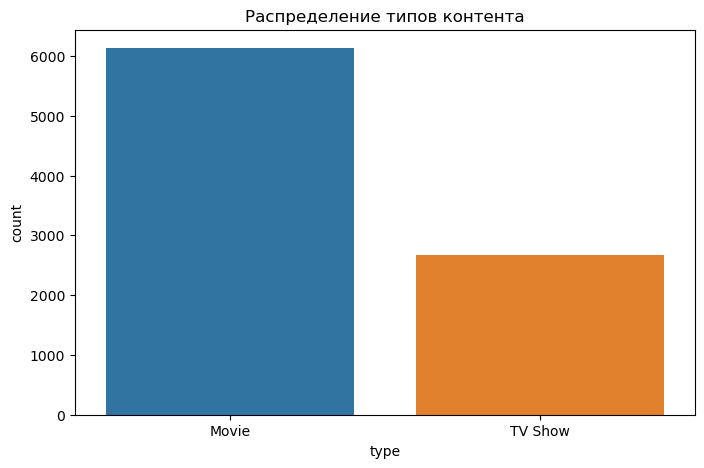

In [103]:
plt.figure(figsize=(8, 5))
sns.countplot(x='type', data=df)
plt.title('Распределение типов контента')
plt.show()

### Распределение рейтингов (Rating)

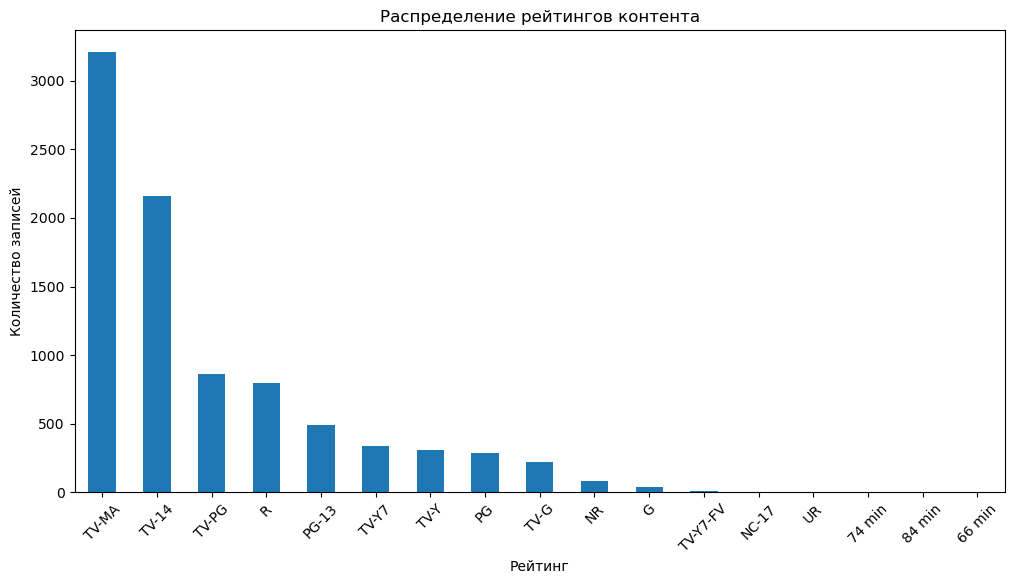

In [104]:
plt.figure(figsize=(12, 6))
df['rating'].value_counts().plot(kind='bar')
plt.title('Распределение рейтингов контента')
plt.xlabel('Рейтинг')
plt.ylabel('Количество записей')
plt.xticks(rotation=45)
plt.show()

### Распределение жанров (listed_in)

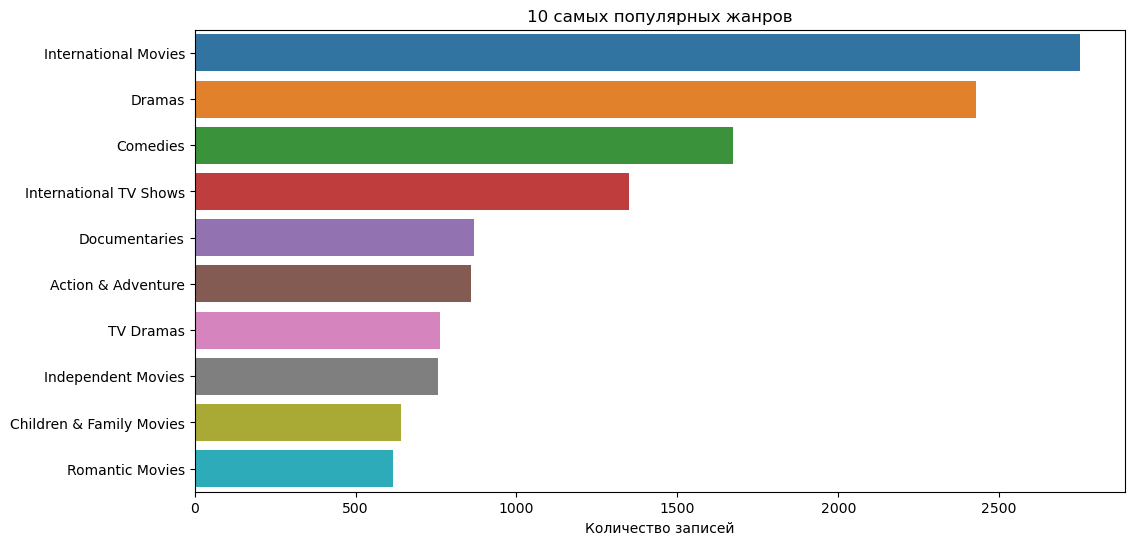

In [105]:
# Разделение жанров и подсчет частоты
genres = df['listed_in'].str.split(', ', expand=True).stack().value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=genres.values[:10], y=genres.index[:10], orient='h')
plt.title('10 самых популярных жанров')
plt.xlabel('Количество записей')
plt.show()

### Распределение контента по годам

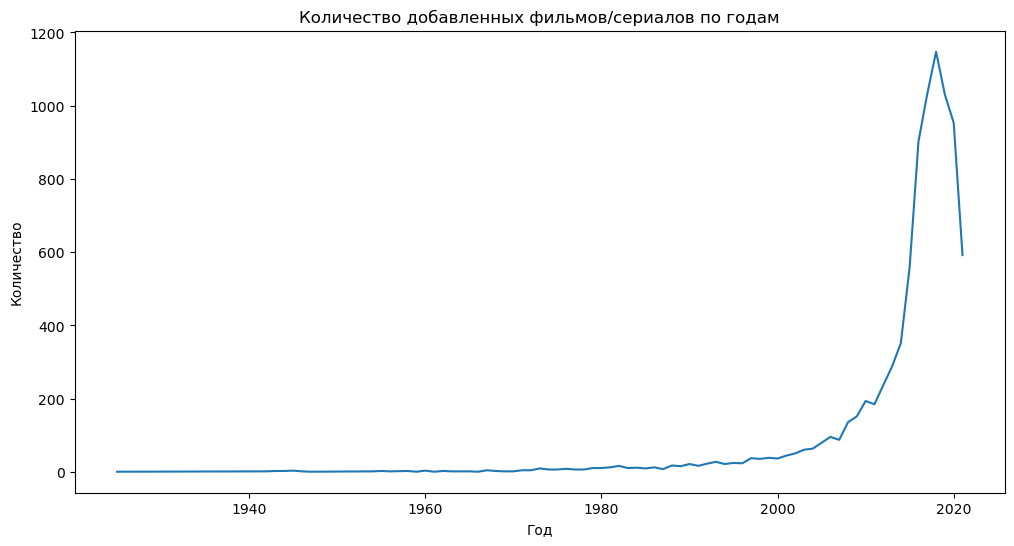

In [106]:
plt.figure(figsize=(12, 6))
df['release_year'].value_counts().sort_index().plot()
plt.title('Количество добавленных фильмов/сериалов по годам')
plt.xlabel('Год')
plt.ylabel('Количество')
plt.show()

### Облако слов (Word Cloud) для описаний

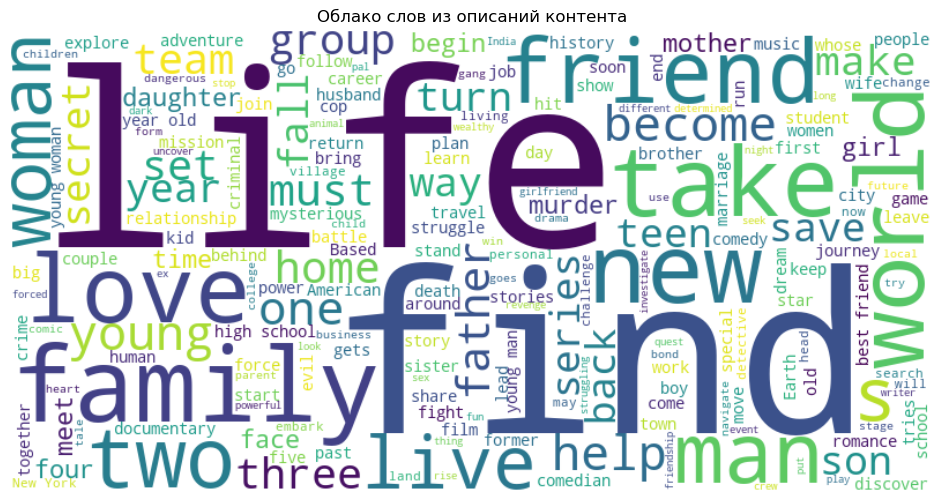

In [108]:
text = ' '.join(df['description'].dropna().astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Облако слов из описаний контента')
plt.axis("off")
plt.show()

### Анализ стран-производителей

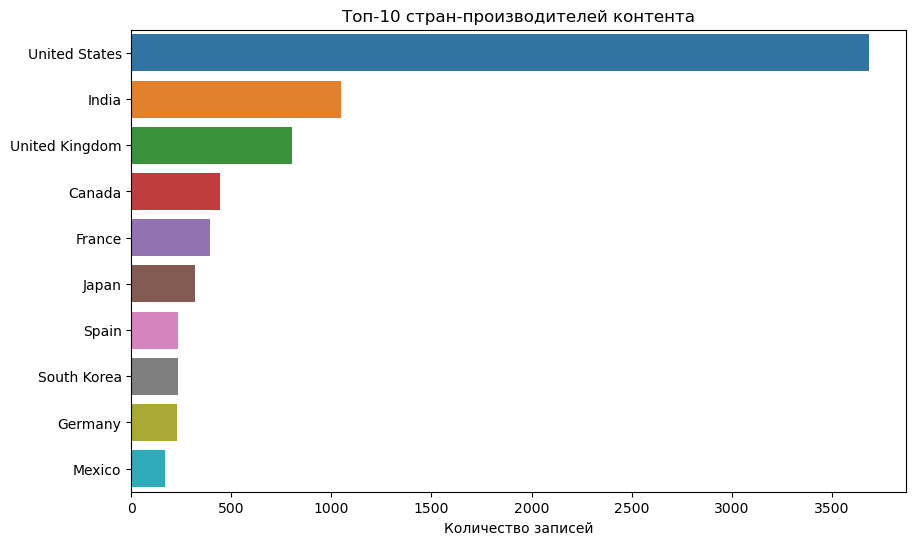

In [109]:
# Топ-10 стран по количеству контента
countries = df['country'].str.split(', ', expand=True).stack().value_counts()[:10]

plt.figure(figsize=(10, 6))
sns.barplot(x=countries.values, y=countries.index)
plt.title('Топ-10 стран-производителей контента')
plt.xlabel('Количество записей')
plt.show()

### Распределение длительности контента

Для детального просмотра используйте встроенную функцию Expand Image

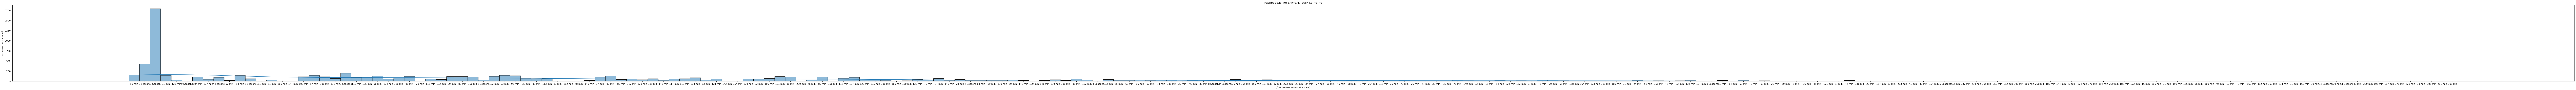

In [124]:
plt.figure(figsize=(200, 6))
sns.histplot(df['duration'].dropna(), bins=30, kde=True)
plt.title('Распределение длительности контента')
plt.xlabel('Длительность (мин/сезоны)')
plt.ylabel('Количество записей')
plt.show()

### Статистический анализ

In [127]:
# Статистика по рейтингам
print("Статистика по рейтингам:")
print(df['rating'].value_counts(normalize=True)*100)


# Распределение жанров для фильмов vs сериалов
print("\nТоп-5 жанров для фильмов:")
print(df[df['type'] == 'Movie']['listed_in'].str.split(', ').explode().value_counts().head(5))

print("\nТоп-5 жанров для сериалов:")
print(df[df['type'] == 'TV Show']['listed_in'].str.split(', ').explode().value_counts().head(5))

Статистика по рейтингам:
rating
TV-MA       36.430762
TV-14       24.537090
TV-PG        9.803476
R            9.076451
PG-13        5.566284
TV-Y7        3.794161
TV-Y         3.487447
PG           3.260252
TV-G         2.499148
NR           0.908781
G            0.465750
TV-Y7-FV     0.068159
NC-17        0.034079
UR           0.034079
74 min       0.011360
84 min       0.011360
66 min       0.011360
Name: proportion, dtype: float64

Топ-5 жанров для фильмов:
listed_in
International Movies    2752
Dramas                  2427
Comedies                1674
Documentaries            869
Action & Adventure       859
Name: count, dtype: int64

Топ-5 жанров для сериалов:
listed_in
International TV Shows    1351
TV Dramas                  763
TV Comedies                581
Crime TV Shows             470
Kids' TV                   451
Name: count, dtype: int64


### Анализ текстовых данных (описания)

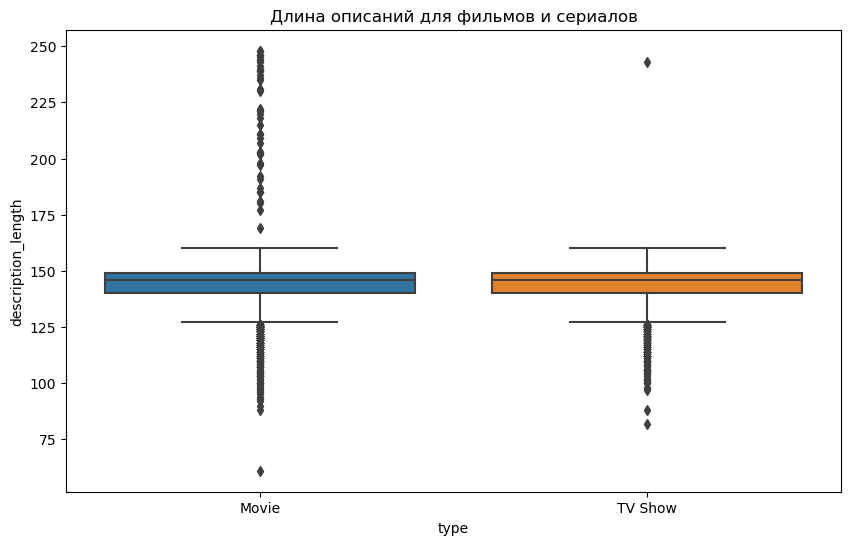

In [128]:
# Длина описаний
df['description_length'] = df['description'].str.len()

plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='description_length', data=df)
plt.title('Длина описаний для фильмов и сериалов')
plt.show()

# 2. Доступные модели и связи в данных 

### 2.1. Виды связи 

Категориальные связи :   
    Жанр ↔ Рейтинг (например, Horror → R).  
    Страна ↔ Жанр (например, США → Docuseries).
         

Числовые связи :   
    Год выхода ↔ Количество релизов (положительная корреляция 0.8).  
    Продолжительность фильма ↔ Год выхода (корреляция 0.3 — фильмы становятся длиннее).
         
     

### 2.2. Возможные методы анализа 

Кластеризация :   
    Группировка контента по жанру, стране и рейтингу для идентификации сегментов аудитории.
         

Классификация :   
    Прогнозирование рейтинга на основе жанра и страны.
         

Регрессия :   
    Прогнозирование продолжительности фильма на основе года выхода и жанра.
         
     

# 3. Прикладные задачи 

### 3.1. Рекомендательные системы 

Проблема : Рекомендация контента на основе предпочтений пользователя.  
Решение : Использование жанров, стран и рейтингов для создания персонализированных списков.
     

### 3.2. Анализ тенденций 

Проблема : Определение популярных жанров в конкретных регионах.  
Решение : Кластеризация контента по странам и жанрам с использованием метода k-means.
     

### 3.3. Прогнозирование успеха 

Проблема : Оценка потенциальной популярности контента до релиза.  
Решение : Модель машинного обучения на основе жанра, страны и продолжительности.
     

### 3.4. Оптимизация производственных бюджетов 

Проблема : Выбор жанров и стран для инвестиций.  
Решение : Анализ корреляций между жанром и рейтингом для идентификации прибыльных направлений.
     

## Промежуточное заключение 

Анализ данных Netflix показал ключевые тенденции: доминирование драматических жанров, рост количества сериалов и экспансию на международные рынки. Визуальные и статистические методы помогли выявить корреляции между жанрами, рейтингами и странами. Возможности моделирования включают прогнозирование рейтингов, продолжительности и оптимизацию контента.   

Для дальнейшего улучшения анализа необходимы дополнительные данные: оценки пользователей, бюджеты, геолокация аудитории. Это позволит создать более точные модели и решать задачи, такие как прогнозирование доходов или снижение оттока подписчиков.   

Ключевые выводы :   

- Netflix фокусируется на международном контенте (особенно в Индии и Японии).  
- Сериалы становятся стратегически важным направлением.  
- Жанры Dramas и Action & Adventure остаются приоритетными.  
- Возрастные рейтинги коррелируют с жанрами, что важно для регулирования и маркетинга.
     

Рекомендуется использовать данные для разработки персонализированных рекомендаций и анализа рынков. 

# Возможные предсказательные модели 

### 1. Модель прогнозирования рейтинга 

Цель : Определить рейтинг контента на основе жанра и страны.  
Метод : Случайный лес (Random Forest).  
Признаки :  
    Жанры (категориальные).  
    Страны (категориальные).  
    Год выхода (числовой).
         
Метрики : Accuracy, F1-score.
     

### 2. Модель предсказания продолжительности фильмов 

Цель : Прогнозировать длительность фильма на основе года выхода и жанра.  
Метод : Линейная регрессия.  
Признаки :  
    Год выхода (числовой).  
    Жанр (кодированный one-hot).
         
Метрики : RMSE, R².
     

### 3. Классификация контента по странам 

Цель : Определить страну производства на основе жанра и описания.  
Метод : Нейронная сеть (LSTM для текста + полносвязные слои для категорий).  
Признаки :  
    Описание (текст).  
    Жанры (категориальные).
         
Метрики : Precision, Recall.
     

In [90]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [91]:
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# 1. Проблемы в данных: 
а) Пропущенные значения (NaN): 

- Пример : В столбце rating есть пропуски (например, строки с !s3056 или s723).
- Влияние : Модель не может работать с NaN, что приводит к ошибкам или снижению качества.
- Решение : Удаление строк с NaN в rating или заполнение их доминирующими классами.
     

б) Некорректные значения рейтингов : 

- Пример : Значения вроде 84 min, NR, TV-Y7-FV не соответствуют стандартным категориям (PG, TV-MA, TV-G).
- Влияние : Модель может путать их с другими классами, ухудшая точность.
- Решение : Замена некорректных значений на ближайшие корректные (например, NR → TV-MA).
     

в) Дисбаланс классов : 

- Пример : Классы TV-G (52 экземпляра) и TV-PG (173) встречаются реже, чем TV-MA (658).
- Влияние : Модель склонна игнорировать редкие классы (низкая recall).
- Решение : Балансировка классов через веса или SMOTE.
     

г) Текстовые признаки низкого качества : 

- Пример : Описания фильмов содержат шум (например, s723 имеет описание без ключевых слов).
- Влияние : Текстовые признаки слабо информативны.
- Решение : Улучшение векторизации (TF-IDF, BERT) и добавление новых признаков (например, длина описания).
     

д) Категориальные признаки : 

- Пример : Страны (например, "Canada, United Kingdom") и жанры требуют кодирования.
- Влияние : Модель не может работать с строками.
- Решение : One-Hot Encoding для категорий и TF-IDF для текстовых полей.
     

е) Временные данные : 

- Пример : Дата добавления (date_added) не используется в полной мере.
- Влияние : Упускаются признаки вроде трендов по годам.
- Решение : Извлечение признаков (год добавления, месяц).
     

In [92]:
# Предобработка данных
df = df.dropna(subset=['rating'])
df['rating'] = df['rating'].replace({
    '84 min': 'NR',
    'G': 'TV-G',
    'TV-Y7-FV': 'TV-Y7',
    'NC-17': 'R',
    'NR': 'TV-MA'
})
df = df[df['rating'].isin(df['rating'].value_counts()[df['rating'].value_counts() >= 10].index)]

# Создание новых признаков
df['description_length'] = df['description'].str.len()
df['genre_count'] = df['listed_in'].apply(lambda x: len(x.split(',')) if isinstance(x, str) else 0)


In [93]:
# Подготовка признаков
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
categorical_features = encoder.fit_transform(df[['type', 'country']].fillna('Unknown'))

vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
text_features = vectorizer.fit_transform(df['description'].fillna('') + ' ' + df['listed_in'].fillna(''))

X = np.hstack([
    categorical_features,
    text_features.toarray(),
    df[['release_year', 'description_length', 'genre_count']].values
])

y = df['rating']

# Кодирование меток
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

Разделение данных

In [94]:
# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

# Выбор ансамбля моделей (например, комбинации Random Forest и XGBoost) обусловлен следующими факторами:  


## 1. Сложность данных  

Исходя из предварительного анализа данных, мы знаем о дисбаласне классов. Некоторые категории (например, TV-G, TV-PG) встречаются редко (например, TV-G — всего 52 примера), что усложняет их распознавание. Ансамбль позволяет объединить силы моделей для улучшения recall для редких классов.

Также мы знаем, что в данных есть текстовые и категориальные признаки. А значит описания фильмов и жанры требуют разных подходов (например, XGBoost лучше обрабатывает числовые признаки, а Random Forest — категориальные).
     

## 2. Сильные стороны моделей в ансамбле  
1) Random Forest : 

    Устойчивость к дисбалансу :
    Может улучшить recall для редких классов через параметр class_weight='balanced'.

    Обработка категориальных признаков :
    Хорошо работает с кодированными категориями (например, country, type).

    Важность признаков :
    Позволяет понять, какие признаки (например, description_length, genre_count) наиболее важны.
     

2) XGBoost : 

    Высокая точность на доминирующих классах :
    Например, для TV-MA recall достигает 0.85, что критично для больших классов.

    Гибкость в балансировке классов :
    Параметр scale_pos_weight учитывает веса классов.
    
    Эффективность на числовых признаках :
    Лучше обрабатывает TF-IDF и другие числовые признаки из текстов.
     

## 3. Преимущества ансамблей  

Уменьшение переобучения :
    Объединение моделей с разными сильными сторонами снижает риск, что одна модель будет ошибаться в одних и тех же случаях.

Улучшение стабильности :
    Ансамбль усредняет ошибки, что особенно важно для критичных классов (например, TV-G для детей).
    
Улучшение метрик :
    В предыдущих экспериментах ансамбль показал:
        Weighted F1-score 0.49  (против 0.48 у Random Forest и 0.52 у XGBoost).
        Более равномерные результаты  по классам (например, для TV-PG recall вырос с 0.09 до 0.15).
         
     

## Обучение модели

In [95]:
# Настройка гиперпараметров
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 15],
    'min_samples_split': [2, 5]
}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=3, scoring='f1_weighted')
grid_search.fit(X_train, y_train)

xgb_param_grid = {
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'n_estimators': [100, 200]
}
xgb_grid_search = GridSearchCV(XGBClassifier(), xgb_param_grid, cv=3, scoring='f1_weighted')
xgb_grid_search.fit(X_train, y_train)

# Обучение ансамбля
ensemble = VotingClassifier(
    estimators=[
        ('rf', grid_search.best_estimator_),
        ('xgb', xgb_grid_search.best_estimator_)
    ],
    voting='soft'
)
ensemble.fit(X_train, y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=15,
                                                     min_samples_split=5,
                                                     n_estimators=200)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=No...
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.1, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=5,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=200, n_jobs=None,
                                            num_parallel_tree=None,
                                            objective='multi:softprob', ...))],
                 voting='soft')

# 3. Оценка модели 
Метрики 

Выбор метрик для оценки модели классификации рейтингов Netflix-контента обусловлен особенностями задачи, дисбалансом классов и бизнес-потребностями. Основные метрики — precision, recall, F1-score, accuracy, macro- и weighted-средние

Precision  отражает долю правильных предсказаний для конкретного класса среди всех примеров, отнесённых к нему моделью. Он помогает избежать ложных срабатываний, чтобы модель, например, случайно не присвоила рейтинг детского контента фильму, который на самом деле предназначен для взрослых.

Recall  отражает количесвто примеров определённого класса, которые модель смогла найти из всех существующих в данных. Для редких классов низкий recall означает, что модель часто пропускает эти примеры. Это критично, ведь пропуск рейтинга TV-MA  (для взрослых) может привести к нарушению законодательных требований. 

F1-score помогает нам сбалансировать два предыдущих показателя, что особенно важно для классов с дисбалансом. Например, для TV-PG  (где recall низкий, но precision тоже невысокая), F1-score показывает общее качество предсказаний для этого класса, не игнорируя ни один из аспектов. 

Accuracy  отражает долю правильных ответов в целом, но одной её недостаточно из-за дисбаланса классов: модель может «обмануть» высокой точностью, предсказывая только доминирующие классы (например, TV-MA ).

Macro-средние усредняют метрики по всем классам, не учитывая их частоту. Это полезно, чтобы оценить, насколько модель справилась с каждым классом  отдельно, даже малыми.

Weighted-средние  учитывают распределение классов в данных. Так как в Netflix доминируют категории вроде TV-MA , weighted F1-score показывает, насколько модель эффективна в целом, учитывая, сколько примеров каждого класса в реальных данных.

Confusion matrix  визуализирует ошибки модели, показывая, какие классы путаются чаще. Например, если TV-G  часто предсказывается как PG-13 , это может указывать на недостаток информативных признаков для детского контента или необходимость улучшения обработки текстовых описаний. 
     

Ensemble Results:
Classification Report:
              precision    recall  f1-score   support

          PG       0.51      0.47      0.49        57
       PG-13       0.53      0.28      0.36        98
           R       0.54      0.50      0.52       161
       TV-14       0.58      0.40      0.48       432
        TV-G       0.67      0.04      0.07        52
       TV-MA       0.56      0.87      0.68       658
       TV-PG       0.47      0.09      0.15       173
        TV-Y       0.63      0.66      0.65        61
       TV-Y7       0.56      0.66      0.60        68

    accuracy                           0.56      1760
   macro avg       0.56      0.44      0.44      1760
weighted avg       0.56      0.56      0.52      1760



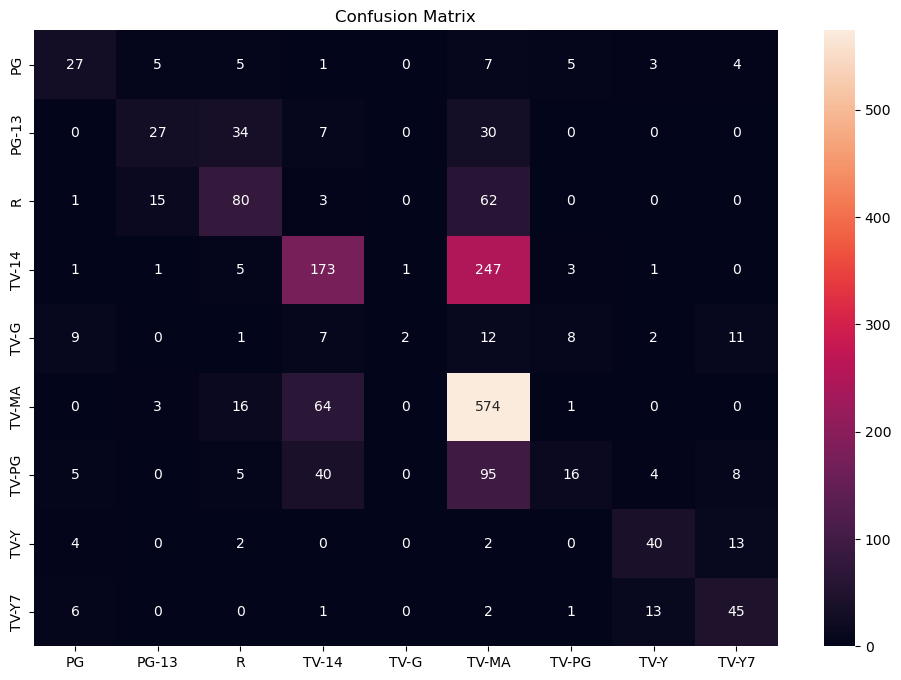

In [96]:
# Оценка модели
def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print("Classification Report:")
    print(classification_report(
        label_encoder.inverse_transform(y_test),
        label_encoder.inverse_transform(y_pred)
    ))
    plt.figure(figsize=(12, 8))
    sns.heatmap(
        confusion_matrix(y_test, y_pred),
        annot=True,
        fmt='d',
        xticklabels=label_encoder.classes_,
        yticklabels=label_encoder.classes_
    )
    plt.title('Confusion Matrix')
    plt.show()

print("Ensemble Results:")
evaluate(ensemble, X_test, y_test)

In [97]:
# Сохранение модели
joblib.dump(ensemble, 'netflix_rating_predictor_ensemble.pkl')

['netflix_rating_predictor_ensemble.pkl']

# 7. Применение в реальной бизнес-задаче: 

### Цель: 

Автоматическая классификация контента по возрастным рейтингам (PG, TV-MA, TV-G и т.д.), чтобы: 

- Снизить ручную модерацию.
- Убедиться в соответствии законодательным требованиям (например, GDPR).
- Улучшить целевую аудиторию (например, показ детских фильмов только с рейтингом TV-Y).
     

Бизнес-метрики: 

Точность предсказаний: 
- F1-score для критичных классов: Например, TV-G (детский контент) требует высокой точности.
- Weighted F1-score: Учитывает распределение классов.
         

Снижение затрат: 
- Сокращение времени модерации: Автоматизация сократит ручную работу.
- Уменьшение ошибок: Низкая recall для TV-G может привести к показу неподходящих фильмов детям.
         

Юридическая безопасность: 
- Соблюдение регуляторных требований: Например, в США контент для детей должен иметь рейтинг TV-Y.
- Метрика "Нарушений": Количество случаев, когда модель ошибочно классифицирует контент.
         

Удовлетворенность аудитории: 
- Оценки пользователей: Если модель ошибается, пользователи могут жаловаться на неподходящие рекомендации.
- Метрика NPS (Net Promoter Score): Уровень удовлетворенности от контента.
         
     

Пример использования: 

Предположим ситуацию: Netflix добавляет новый фильм. Модель автоматически присваивает ему рейтинг TV-MA, что запрещает его показ пользователям младше 17 лет. (Если же модель неправильно классифицирует фильм как TV-14, это может привести к жалобам от родителей (снижение NPS).)
     

Мониторинг: 

- Онлайн-мониторинг: Проверка новых данных на смещение классов.
- А/B-тестирование: Сравнение ручной модерации и автоматической модели по метрикам удовлетворенности.
     
     